In [6]:
import numpy as np
import matplotlib.pyplot as plt

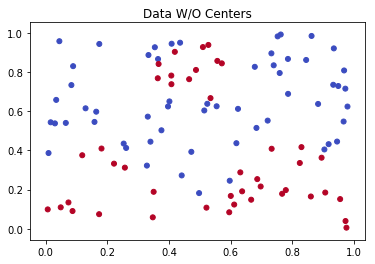

In [7]:
#### part a
N = 100
size=(N,2)
np.random.seed(4)
X = np.random.uniform(0,1,size)
def label(X):
    C1, C2, r = [],[],[]
    for x,y in X:
        if y < 0.3+0.2*np.sin(10*x) :
            r.append(1.)
            C1.append([x,y])
        elif (y - 0.8)**2 + (x - 0.5)**2 < 0.15**2:
            r.append(1.)
            C1.append([x,y])
        else:
            r.append(-1.)
            C2.append([x,y])
    return np.asarray(r),np.array(C1),np.array(C2)
d,C1,C2 = label(X)
fig1 = plt.figure()
plt.title("Data W/O Centers")
plt.scatter(X[:, 0], X[:, 1], c=d, s=25, cmap=plt.cm.coolwarm)
plt.show()



In [11]:
#### part c
class RBF(object):
    def __init__(self, k, c, sigma = 1e-5, epochs = 1500, lr = 0.1):
        self.k = k
        self.w = np.random.uniform(0,1,k*2 + 1)
        self.c = c
        self.sigma = sigma
        self.epochs = epochs
        self.lr = lr
    def gaussian(self,point):
        r = [np.exp(-np.power(np.linalg.norm(point - center),2))/self.sigma for center in self.c]
        r.insert(0,1)
        return np.array(r)

    def PTA_algorithm(self,data,label):
        error = 0
        y=0
        for i, p in enumerate(data):
            phi = self.gaussian(p)
            y= self.w @ phi
            g = np.sign(y)
            if g*d[i] <= 0:
                self.w += self.lr*phi*d[i]
                error += 1
        return error
    
    def fit(self,data,label):
        e_num = []
        error = self.PTA_algorithm(data,label)
        e_num.append(error)
        while e_num[-1] != 0 and self.epochs > 0:
            error = self.PTA_algorithm(data,label)
            if error > e_num[-1]:
                self.lr *= 0.9
            e_num.append(error)
            self.epochs -= 1
        return e_num

    def project(self,data):
        score=np.zeros(data.shape[0])
        for i in range(data.shape[0]):
            g = self.w @self.gaussian(data[i])
            if g > 1e-1 or g< -1e-1:
                score[i] = g
        return score
    

In [ ]:
rbf = RBF(10,centers)
#rbf = RBF(2,centers) #### part d: within 4 centers
e_num = rbf.fit(X,label)
#print(e_num)
fig2 = plt.figure()
x1,x2 =np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
x_= np.array([[x1,x2] for x1,x2 in zip(np.ravel(x1),np.ravel(x2))])
z=rbf.project(x_).reshape(x1.shape)
H = plt.contour(x1,x2,z, [0.0], colors='b', linewidths=3, origin= 'lower')



In [ ]:

plt.clabel(H, inline=True, fmt=" decision Boundary", fontsize=10)
plt.scatter(X[:, 0], X[:, 1], c=d, s=15, cmap=plt.cm.coolwarm)
plt.scatter(centers1[:, 0], centers1[:, 1], s=50,color='green',label="C$_1$")
plt.scatter(centers2[:, 0], centers2[:, 1],s=50, color='orange',label="C$_2$")
plt.title(f" when k ={k} Centers")
plt.legend()
plt.show()
fig3 = plt.figure()
plt.scatter(centers[:, 0], centers[:, 1], c=dCent, s=25, cmap=plt.cm.RdYlGn)
plt.title("Centers Figure")
plt.show()

